In [20]:
# Set of libraries that necessary for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dow Jones Industrial Average Historical Data.csv to Dow Jones Industrial Average Historical Data.csv


In [3]:
# Reading dataset
df = pd.read_csv("Dow Jones Industrial Average Historical Data.csv")
df.head(5)


,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2019","28,538.44","28,414.64","28,547.35","28,376.49",193.34M,0.27%
1,"Dec 30, 2019","28,462.14","28,654.76","28,664.69","28,428.98",185.07M,-0.64%
2,"Dec 27, 2019","28,645.26","28,675.34","28,701.66","28,608.98",184.93M,0.08%
3,"Dec 26, 2019","28,621.39","28,539.46","28,624.10","28,535.15",155.97M,0.37%
4,"Dec 24, 2019","28,515.45","28,572.57","28,576.80","28,503.21",95.29M,-0.13%


In [4]:
# Replacing necessary columns from the dataset
df['Price'] = df['Price'].apply(lambda x: x.replace(',',''))
df['Price'] = df['Price'].astype(float)

df['Open'] = df['Open'].apply(lambda x: x.replace(',',''))
df['Open'] = df['Open'].astype(float)


df['High'] = df['High'].apply(lambda x: x.replace(',',''))
df['High'] = df['High'].astype(float)

df['Low'] = df['Low'].apply(lambda x: x.replace(',',''))
df['Low'] = df['Low'].astype(float)

df['Change %'] = df['Change %'].astype(str)

df['Vol.'] = df['Vol.'].str.split("M", n = 1, expand = True)
df['Vol.'] = df['Vol.'].replace(to_replace =["-"], value = 0)
df['Vol.'] = df['Vol.'].astype(float)


In [ ]:
# Get information about the dataset after performing replacing operation on given dataset
df.info()

In [7]:
# Input/Independent Variables
X = df[['Open','High','Low','Vol.']]


In [8]:
# Output/Dependent Variables
Y = np.where(df['Price'].shift(-1)>df['Price'], 1, -1)

In [9]:
# Spliting dataset for training and testing
split_percent = 0.8
split = int(split_percent*len(df))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

Text(0, 0.5, 'Error Rate')

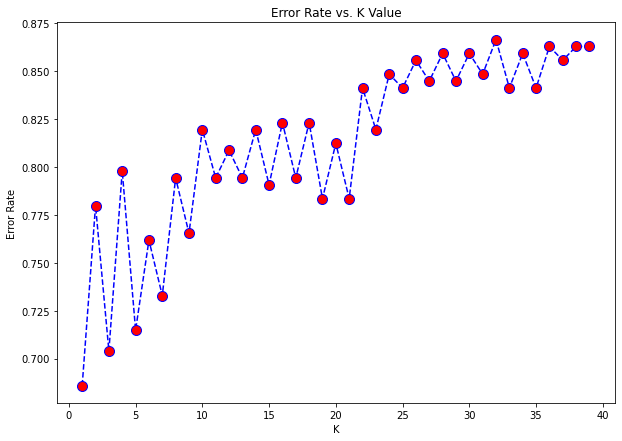

In [18]:
# Finding optimal k value 
error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(Y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [22]:
# Implement KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

In [24]:
# Accuracy over training dataset
print(accuracy_train)

0.7079566003616636


In [23]:
# Accuracy over test dataset
print(accuracy_test)

0.5685920577617328


In [21]:
# KNN Model evaluation
print(confusion_matrix(Y_test, preds))
print(classification_report(Y_test, preds))

[[309   0]
 [239   6]]
              precision    recall  f1-score   support

          -1       0.56      1.00      0.72       309
           1       1.00      0.02      0.05       245

    accuracy                           0.57       554
   macro avg       0.78      0.51      0.38       554
weighted avg       0.76      0.57      0.42       554

